In [311]:
#House Price Prediction Regression Project

In [312]:
#Load libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar

In [313]:
#load data
train_data_path = r"E:\BHARAT.DATA\padhai\carrier\Projects\House_Price_Prediction\data\train.csv"
test_data_path = r"E:\BHARAT.DATA\padhai\carrier\Projects\House_Price_Prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
print("shape of df_train", df_train.shape)   # it gives total rows and columns
print("shape of df_test", df_test.shape)

shape of df_train (1460, 81)
shape of df_test (1459, 80)


In [314]:
#to see total coulmn and rows                     None represent total 
pd.set_option("display.max_columns",None)  #  if  i replace  None with any number
pd.set_option("display.max_rows",None)     #  than that amount of rows and columns able to see 

In [315]:
df_train.head()  # default  5 rows dikhti hai  and columns bhi limited dekhte hai 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [316]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [317]:
# Know Your Data

In [318]:
# important columns  for house price
# will use this feature while converting into numerical format /Encoding
"""
Neighborhooh
OverallQual
Overallcond
YearBuilt
Foundation  *
Electrical
KitchenQual
GargeType
GarageFinish
Fence
"""

'\nNeighborhooh\nOverallQual\nOverallcond\nYearBuilt\nFoundation  *\nElectrical\nKitchenQual\nGargeType\nGarageFinish\nFence\n'

In [319]:
#Data Integration
#Data Integration is the process of combining data from 
# different sources to provide a unified view. This is often a 
# preprocessing step before training machine learning models.

In [320]:
# combine two data 
df = pd.concat([df_train,  df_test])
print("shape of integrated data/ DF",df.shape)

shape of integrated data/ DF (2919, 81)


In [321]:
# as we know that df_test having 80 column and   df_train having 81 columns 
# so  the one who not having columns  put null 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [322]:
# df.tail() is a pandas function
#  used in Python to view the last few rows of a DataFrame.
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [323]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [324]:
#get the breif information  of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [325]:
#most null value
#Alley 
#FireplaceQu
#PoolQC
#Fence
#MiscFeature

In [326]:
# i shape[0 ]  totala row ,, shape[1]  represent  total columns
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer feature :",int_features.shape[0])
print("Total  integers columns in list  :",int_features.tolist())

Total number of integer feature : 26
Total  integers columns in list  : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [327]:
#getting columns that having data of float64
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of float feature :",float_features.shape[0])
print("Total float64 columns in list  :",float_features.tolist())

Total number of float feature : 12
Total float64 columns in list  : ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [328]:

cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of categorical feature :",cat_features.shape[0])
print("Total categorical columns in list  :",cat_features.tolist())

Total number of categorical feature : 43
Total categorical columns in list  : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [329]:
# get the statistical information of numerical features


In [330]:
# df.describe() gives you the numerical summary of all numeric columns in your
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [331]:
df.describe().shape

(8, 38)

In [332]:
# note in count  not include null vlaue 


#If values are close to the mean, standard deviation is small.

#If values are far from the mean, standard deviation is large.
#Standard deviation measures the 
# "average distance" of each value from the mean.

#"Are the values tightly packed, or widely spread out?"

"""
raw : [1,3,4,2,5,6,8,7,9]
sot : [0,1,2,3,4,5,6,7,8,9]

1%(min)  = 0
25%  = 2.5
50%  = 4.5
75%  = 7.5
100%(max) = 9
"""

'\nraw : [1,3,4,2,5,6,8,7,9]\nsot : [0,1,2,3,4,5,6,7,8,9]\n\n1%(min)  = 0\n25%  = 2.5\n50%  = 4.5\n75%  = 7.5\n100%(max) = 9\n'

In [333]:
## Handling the missing values 

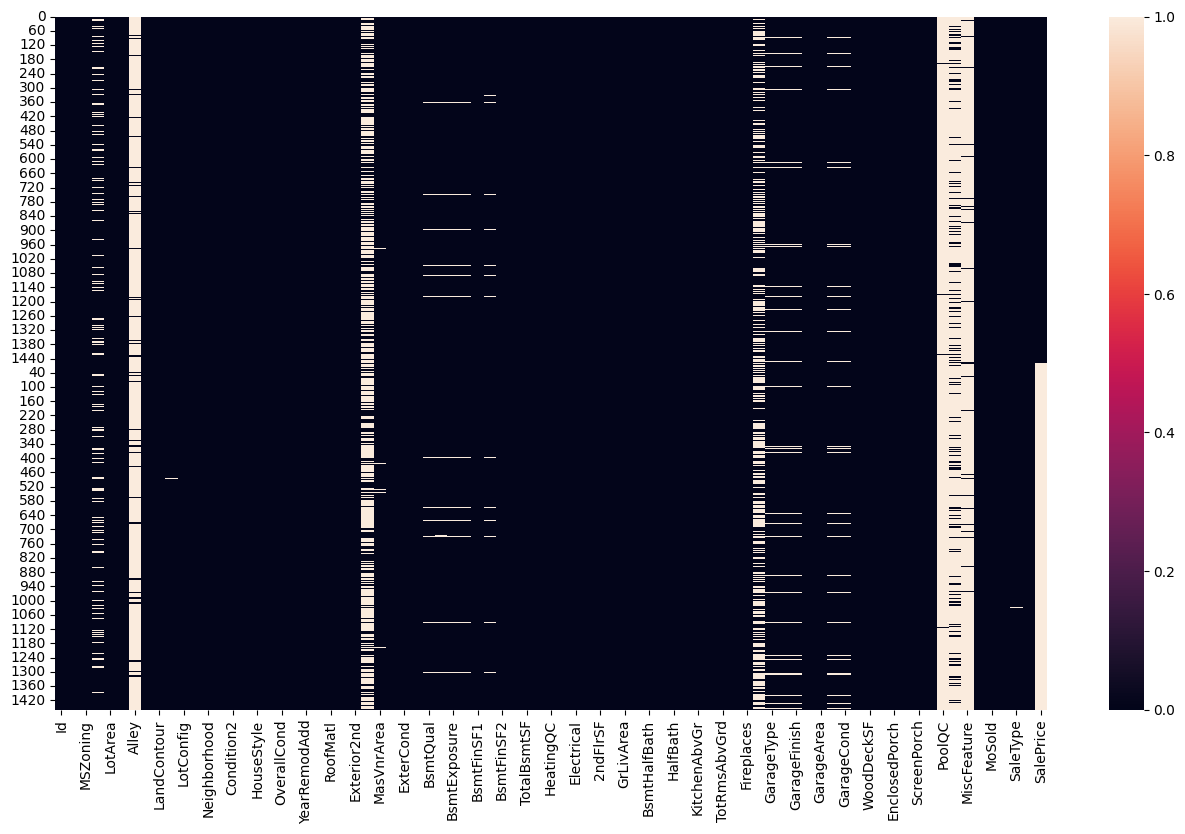

In [334]:
# visualise null/Missing value
plt.figure(figsize = (16,9))  # this create new figure for plotting
                                # and set size in inches 
                                # and this is function of matplotlib 

sns.heatmap(df.isnull())  # sns is a seaborn , which is built on top of matplotlib for better visuals
                            # it create heatmap

plt.savefig("EDA_img/heatmap_DF_of_null_values.png") # this saves the current figure as a PNG image
                                                    # EDA_img is folder name 
                                                    # and "heatmap_DF_of_null_values.png" is file name 
                                                    # this is function of matplotlib
                                                    


In [335]:
# get the null value percentage for every feature


In [336]:
# Set index as ID column       # as we know  we not get any infomation  to id  so we set as a index 
df = df.set_index("Id")

In [337]:
null_percent = df.isnull().sum()
print(null_percent)


MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [338]:
# aim to get percentage of null of each columns 

In [339]:
#self done
for i in df.columns:
    each_columns_total_null = df[i].isnull().sum()
    each_columns_total_data = df[i].size 
    each_columns_total_null_percent = (each_columns_total_null / each_columns_total_data) * 100
    print(i+" = " ,each_columns_total_null_percent , "%")

MSSubClass =  0.0 %
MSZoning =  0.1370332305584104 %
LotFrontage =  16.649537512846866 %
LotArea =  0.0 %
Street =  0.0 %
Alley =  93.21685508735868 %
LotShape =  0.0 %
LandContour =  0.0 %
Utilities =  0.0685166152792052 %
LotConfig =  0.0 %
LandSlope =  0.0 %
Neighborhood =  0.0 %
Condition1 =  0.0 %
Condition2 =  0.0 %
BldgType =  0.0 %
HouseStyle =  0.0 %
OverallQual =  0.0 %
OverallCond =  0.0 %
YearBuilt =  0.0 %
YearRemodAdd =  0.0 %
RoofStyle =  0.0 %
RoofMatl =  0.0 %
Exterior1st =  0.0342583076396026 %
Exterior2nd =  0.0342583076396026 %
MasVnrType =  60.500171291538194 %
MasVnrArea =  0.7879410757108599 %
ExterQual =  0.0 %
ExterCond =  0.0 %
Foundation =  0.0 %
BsmtQual =  2.774922918807811 %
BsmtCond =  2.8091812264474134 %
BsmtExposure =  2.8091812264474134 %
BsmtFinType1 =  2.7064063035286057 %
BsmtFinSF1 =  0.0342583076396026 %
BsmtFinType2 =  2.7406646111682083 %
BsmtFinSF2 =  0.0342583076396026 %
BsmtUnfSF =  0.0342583076396026 %
TotalBsmtSF =  0.0342583076396026 %
He

In [340]:
#done by master 
null_percent= df.isnull().sum()/df.shape[0] * 100
print(null_percent)

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [341]:
#drop columns / Feature

"""As per domin knowledge  we will not drop those ffeatures , instead None value 
we will add constant value 'NA' """
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [342]:
# as per i understand  many houses does not having  
# Alley  so deos it not having the vlaues so we not remove that data 
# bcz not haviing  alley in any house is also kind of data 
# so we replace the missing values 
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [343]:
"""As per domin knowledge  we will not drop FirePlaceQu ffeatures , instead None value 
we will add constant value 'NA' """
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [344]:
# miss_value_5_20_perc  this store the values in form of dictonary keys and vlaues

miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [345]:
#This line counts how many times each value appears 
# in the LotFrontage column of your dataset df.
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

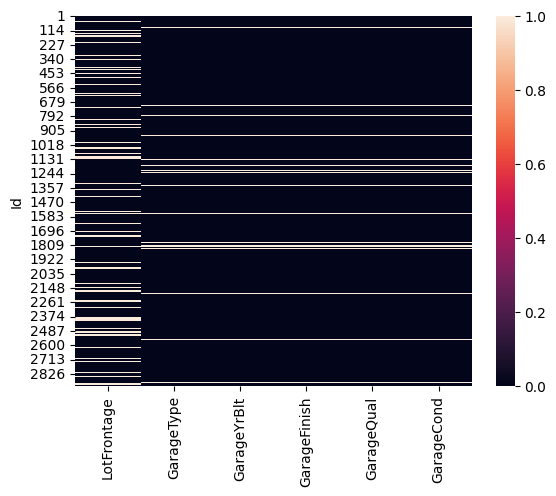

In [346]:
#  this visual show that  where the garge not present nothing each types present 
# like its type year of built  finsh quality condition 
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [347]:
# note  when our data having  missing vlaues less than 5% 
# we cannot we remove that data  
# if in case any columns haivng missing value more  than 5% than 
# we can analyissi that columns  and as per domain knowledge 
# we will analysis that we  remove that columns (data) or not 
""" always check domain knowledge  before decide to remove any columns as per their missing values"""
# their is no threshold method to remove missing value we need to go dip 
#inside the dataset and analysis which columns has to remove or not as per their missing values 

' always check domain knowledge  before decide to remove any columns as per their missing values'

In [348]:
### As per Observation we will not drop any feature from dataset

In [349]:
## Mssing Values  Imputation =
"""🎯 Filling in the missing (NaN) values in
 your dataset with something useful so that you can
 continue with data analysis or machine learning."""


'🎯 Filling in the missing (NaN) values in\n your dataset with something useful so that you can\n continue with data analysis or machine learning.'

In [350]:
missing_value_feat = null_percent[null_percent > 0]
print("total missing values ",missing_value_feat)

total missing values  MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64


In [351]:
# in eailer  we already  seperate the featrues of int float and categorical 
# now from that we seperate the  missing values  

In [352]:
#  brother  as we know that  we already find out the int feature , float feature , catagorical feature
#categorical null feature
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total number of categorical missing features = ", len(cat_na_feat))
cat_na_feat

total number of categorical missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [353]:
#int null features
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total number of categorical missing features = ", len(int_na_feat))

total number of categorical missing features =  0


In [354]:
#float null  features
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total number of categorical missing features = ", len(float_na_feat))

total number of categorical missing features =  12


In [355]:
### handling missing vlaues from categorical data 
 

In [356]:
### handling    MSZoning = 0.137033

In [357]:
# in categorical data we have to focus not  mode vlaue (max frequency)

In [358]:
# it tell basically  any rows came how much time 
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

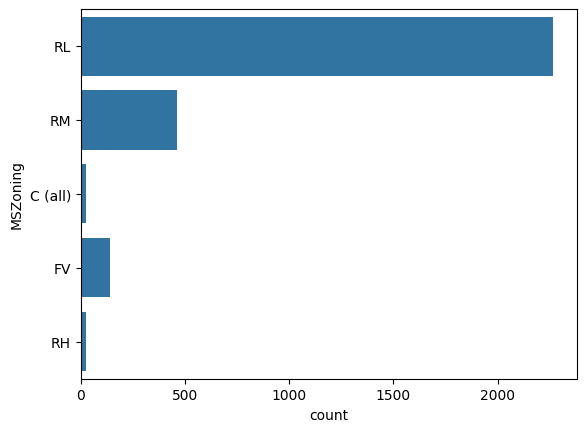

In [359]:
sns.countplot(df["MSZoning"])  # count mean number of repeating rows in particular columns


In [360]:
### backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [361]:
# mode of MsZofning
#np.nan stands for "Not a Number" — it's a special constant in NumPy (imported as np)
#  that represents missing or undefined numerical data.
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\2560681128.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)


np.int64(0)

In [362]:
def oldNewCountPlot(df, df_new , feature):
    plt.subplot(121)                    # one row two column me 1 column
    sns.countplot(df[feature])
    plt.title("Old Data Dustribution")
    plt.subplot(122)                   # one row two column me 2 column
    sns.countplot(df_new[feature])
    plt.title("New Data Distribution")

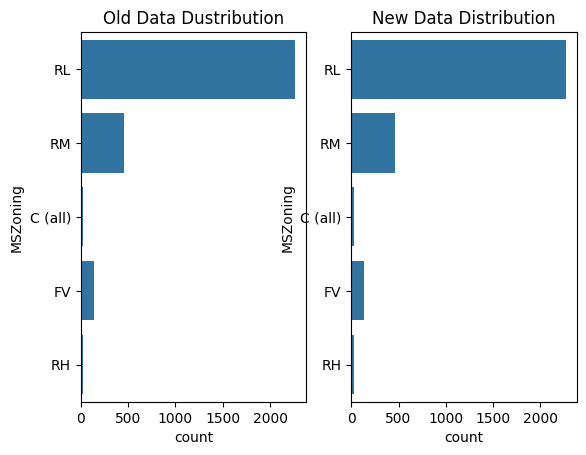

In [363]:
oldNewCountPlot(df , df_mvi  , "MSZoning")

In [364]:
# now handle  the missing value of Alley columns  from categorical data 

In [365]:
Alley_Cons = "NA"
df_mvi["Alley"].replace(np.nan , Alley_Cons , inplace = True)
df_mvi["Alley"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\3329168436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan , Alley_Cons , inplace = True)


np.int64(0)

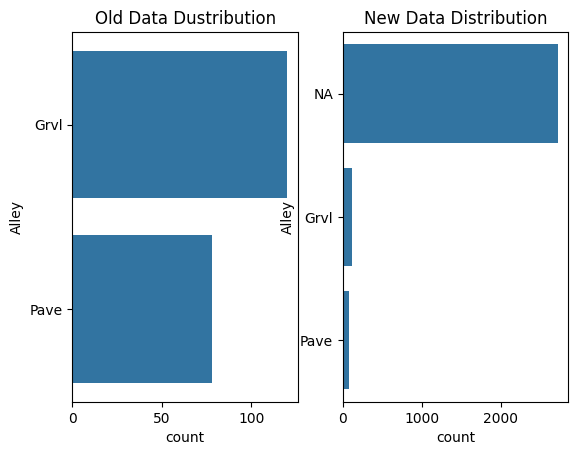

In [366]:
# now make graph  to identify difference 

oldNewCountPlot(df,df_mvi,"Alley")

In [367]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [368]:
# handle  missing vlaue of  Utilities columns   from categorical data 

In [369]:
Utilities_mode = df_mvi["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,Utilities_mode,inplace = True)
df_mvi["Utilities"].isnull().sum()



C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\3047653555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan,Utilities_mode,inplace = True)


np.int64(0)

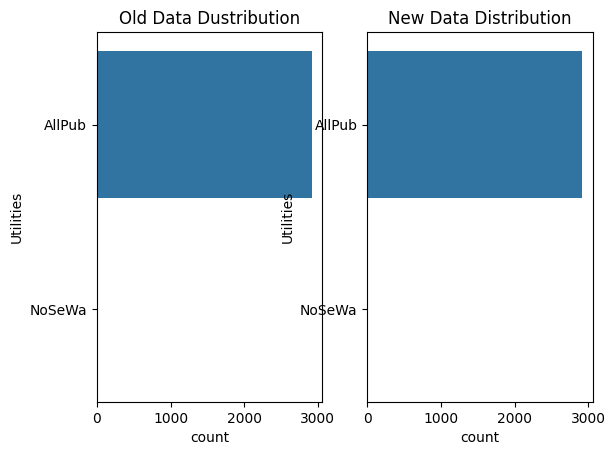

In [370]:
#  now  make graph  to see diffrence
oldNewCountPlot(df,df_mvi,"Utilities")


In [371]:

# handle the missing of LotFrontage from float 64

# NOTE in numericall data we mmust fill missing value using some numericall data only like mean and median
# not a "NA" ok bcz it is string   
#

In [372]:
#LotFrontage_cons = "NA"
#df_mvi.replace(np.nan,LotFrontage_cons,inplace=True)
#df_mvi["LotFrontage"].isnull().sum()


In [373]:
#oldNewCountPlot(df,df_mvi,"LotFrontage")

In [374]:
## bhai dekh  graph ke niche vala men  thoda appne according kar diya tha vo galt tha according  now abhi  sirvla karuga   of LotFrontage

In [375]:
#  handling missing value of  LotFrontage   which is numerical  now i need to check  what value should i filled 
# mean or median 


In [376]:
def boxHistplot(df,figsize=(15,5)):
    plt.figure(figsize = figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.histplot(df,kde=True) # line vala graph   ## the one who has long tail is that skew is present 
    # using  kde(Kernel Density Estimation)

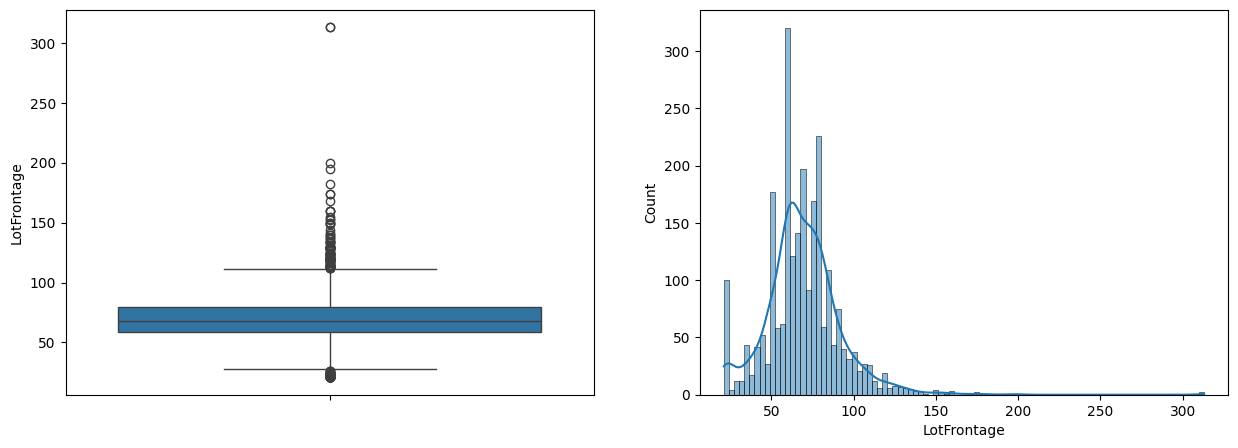

In [377]:
boxHistplot(df["LotFrontage"])

In [378]:
# note if the data distribution in dataset is left and right   
#  skew than we should handle the missing value using median  
# nad in meddle tha n   mean  tihs  all talking about histogram  or liine graph

In [379]:
df_mvi["LotFrontage"].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
72.0      39
74.0      39
73.0      33
62.0      31
79.0      28
82.0      28
100.0     28
52.0      28
51.0      27
59.0      27
66.0      26
57.0      26
76.0      25
55.0      24
53.0      24
43.0      23
67.0      22
88.0      22
69.0      20
71.0      19
56.0      19
35.0      19
44.0      19
84.0      18
81.0      18
61.0      17
58.0      17
34.0      16
48.0      16
40.0      16
86.0      15
95.0      15
92.0      15
77.0      15
110.0     15
96.0      14
91.0      14
120.0     14
41.0      14
93.0      13
83.0      13
42.0      12
94.0      12
105.0     12
98.0      12
107.0     11
30.0      11
87.0      11
89.0      10
54.0      10
45.0      10
102.0     10
32.0       8
47.0       8
36.0       8
37.0       7
103.0      6
99.0       6
108.0      6
39.0       6
104.0      5
97.0       5


In [380]:
lotfrontage_median = df_mvi["LotFrontage"].median()


In [381]:
df_mvi["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [382]:
df_mvi.head()
df["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [383]:
lotfrontage_median = df_mvi["LotFrontage"].median()
lotfrontage_median



np.float64(68.0)

In [384]:

df_mvi["LotFrontage"].replace(np.nan,lotfrontage_median,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\766977478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan,lotfrontage_median,inplace=True)


np.int64(0)

In [385]:
# make  graph  for looking clear difference
def oldNewBoxHistPlot(df,df_new,feature,figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.histplot(df[feature],kde=True)
    plt.title("Old Data Distrubution")

    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.histplot(df_new[feature],kde=True)
    plt.title("New Data Distrubution")
    

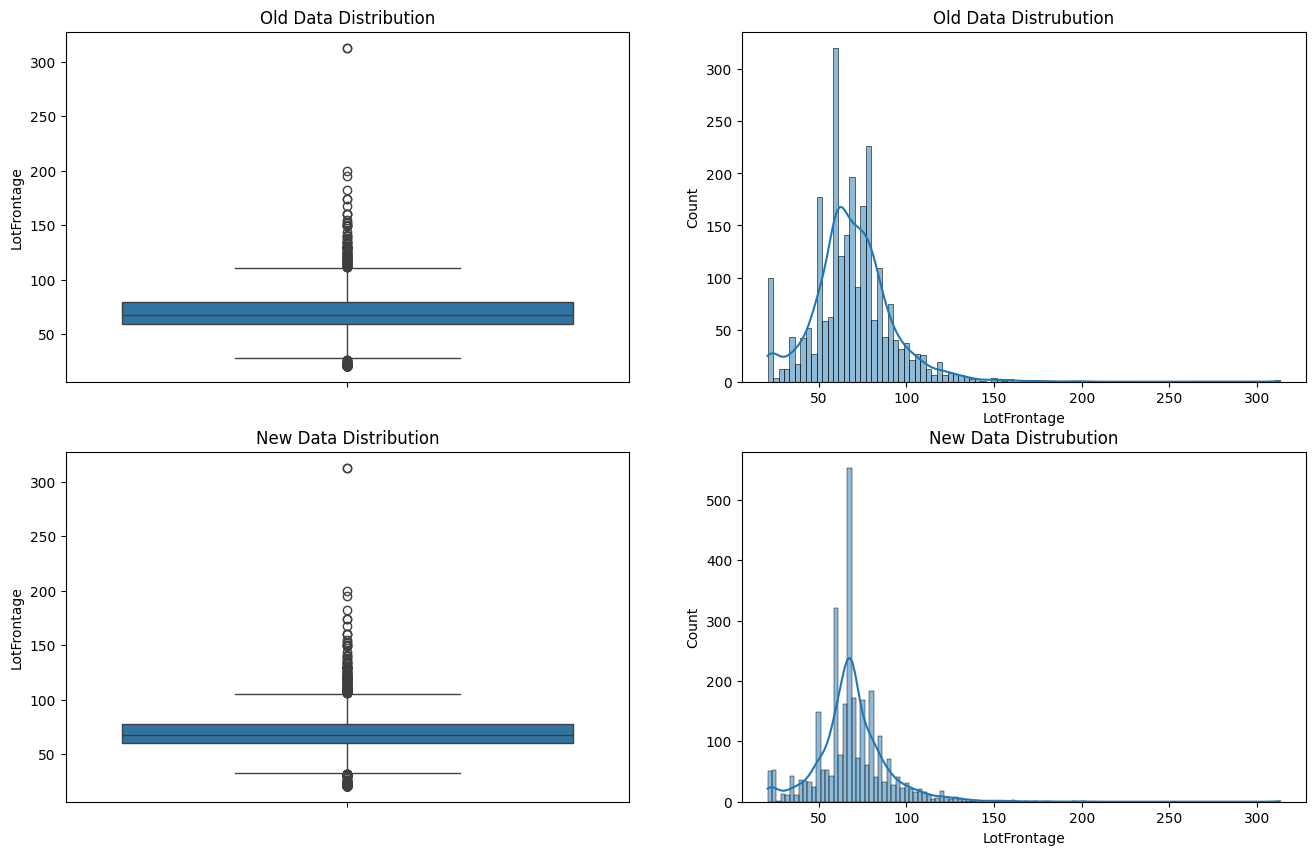

In [386]:
oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

In [387]:
## handing  the missing values of Exterior1st   this is object 
# so use mode to handle is 

In [388]:
df_mvi["Exterior1st"].describe()
#df_mvi["Exterior1st"].value_counts()

count        2918
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

In [389]:
exterior1st_mode=df_mvi["Exterior1st"].mode()[0]      
df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode,inplace=True)
df_mvi["Exterior1st"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\2310559109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode,inplace=True)


np.int64(0)

In [390]:
## handing  the missing values of Exterior2nd   this is object 
# so use mode to handle is 

In [391]:
df_mvi["Exterior2nd"].describe()
#df_mvi["Exterior2nd"].value_counts()

count        2918
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object

In [392]:
exterior2nd_mode=df_mvi["Exterior2nd"].mode()[0]      
df_mvi["Exterior2nd"].replace(np.nan,exterior2nd_mode,inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\2313870492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan,exterior2nd_mode,inplace=True)


np.int64(0)

<Axes: ylabel='Id'>

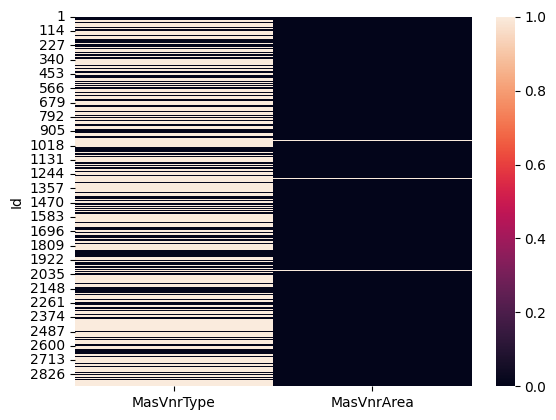

In [393]:
#graph of  MasVnrType and MasVnrArea
sns.heatmap(df[["MasVnrType" , "MasVnrArea"]].isnull())

In [394]:
#df[df[["MasVnrType" , "MasVnrArea"]].isnull().any(axis=1)]

In [395]:
## now handle  the missing values of MasVnrType    and it is object   also having none 
# so i replace mssing values with NAN


In [396]:
df_mvi["MasVnrType"].value_counts()
#df_mvi["MasVnrType"].describe()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [397]:
masVnrType_NAN="NAN"
df_mvi["MasVnrType"].replace(np.nan,masVnrType_NAN,inplace=True)
df_mvi["MasVnrType"].isnull().sum()


C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\1117867165.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan,masVnrType_NAN,inplace=True)


np.int64(0)

In [398]:
#some thing extra learnnig 
df_mvi["MasVnrType"].value_counts()
#df_mvi["MasVnrType"].shape
#df_mvi["MasVnrType"].isnull().sum()

MasVnrType
NAN        1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64

In [399]:
df["MasVnrType"].value_counts()
df["MasVnrType"].shape
df["MasVnrType"].isnull().sum()

np.int64(1766)

In [400]:
#  i also need to handle this MasVnrArea   is MasVnrType not preset it mean 
#MasVnrArea this also not preset  this  replace with 0 value


In [401]:
'''masVnrArea_NAN = 0
df_mvi["MasVnrArea"].replace(np.nan,masVnrArea_NAN,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()
masVnrArea_NAN'''

'masVnrArea_NAN = 0\ndf_mvi["MasVnrArea"].replace(np.nan,masVnrArea_NAN,inplace=True)\ndf_mvi["MasVnrArea"].isnull().sum()\nmasVnrArea_NAN'

<Axes: ylabel='Id'>

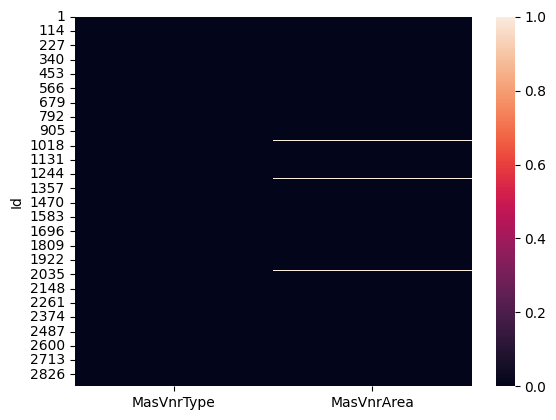

In [402]:
sns.heatmap(df_mvi[["MasVnrType" , "MasVnrArea"]].isnull())
# pink colour show therir is no missing values

In [403]:
df["MasVnrType"].value_counts() #  i not able to see none so what ever i did  i am 
# right


MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [404]:
df_mvi["MasVnrType"].value_counts()

MasVnrType
NAN        1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64

In [405]:
#df_mvi[df_mvi["MasVnrType"] == "AllPub"]
#SOME THING ISSUE IS THEIR  SAHI KARNA HIA MAY BE  MERA  DF_MVI thoda  galat data hogay ahai 


##  now i resolve this problem



In [406]:
df_mvi["MasVnrArea"].isnull().sum()

np.int64(23)

In [407]:
# handle the missing vlaue of MasVnrArea

In [408]:
df_mvi["MasVnrArea"].value_counts()

MasVnrArea
0.0       1738
120.0       15
200.0       13
176.0       13
216.0       12
180.0       12
108.0       11
72.0        11
16.0        11
144.0       11
340.0       10
210.0        9
80.0         9
196.0        9
128.0        9
302.0        8
40.0         8
256.0        8
170.0        8
178.0        8
132.0        8
260.0        7
174.0        7
320.0        7
44.0         7
300.0        7
270.0        7
106.0        7
50.0         7
456.0        7
84.0         7
203.0        7
76.0         7
240.0        7
140.0        7
186.0        7
60.0         7
164.0        7
420.0        7
360.0        7
252.0        7
112.0        6
288.0        6
504.0        6
232.0        6
143.0        6
246.0        6
90.0         6
130.0        6
198.0        6
145.0        6
306.0        6
100.0        5
162.0        5
82.0         5
513.0        5
182.0        5
168.0        5
88.0         5
160.0        5
148.0        5
172.0        5
268.0        5
98.0         5
194.0        5
150.0        5

In [409]:
# MasVnrArea this is numeriacal  colunms now  we check does it field with  meadian or mean 
# one more thing that  MasVnrType having  nan value it mean where that is not presenT  MasVnrArea THIS IS also not present 


In [410]:
#MasVnrArea is fill with 0
df_mvi["MasVnrArea"].value_counts()
masvnrarea_NaN = 0
df_mvi["MasVnrArea"].replace(np.nan , masvnrarea_NaN , inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\4206408617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan , masvnrarea_NaN , inplace=True)


np.int64(0)

In [411]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [412]:
#Index (left side)	Value (right side)
#Both as key-value pairs	.to_dict()
missing_columns = missing_value_feat.index.tolist()
missing_columns 

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [413]:
# this contain the only the objects columns that have some missing vlaues 
df_mvi[missing_columns].select_dtypes(include = 'object').columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [414]:
# this all are the  categorical features of basement
cat_bsmt_feat=['BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2']

In [415]:
df_mvi[missing_columns].select_dtypes(include='Float64').columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [416]:
# this all are the  float 64  missing vlaues features of basement 
num_bsmt_feat = ['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath']

In [417]:
# handling basement feature

<Axes: ylabel='Id'>

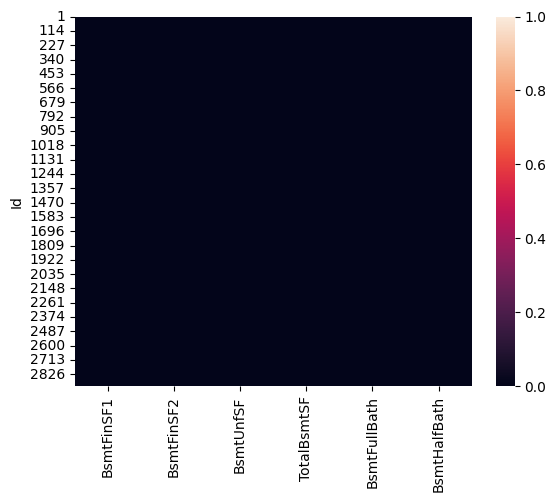

In [418]:
sns.heatmap(df_mvi[['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath']].isnull())

<Axes: ylabel='Id'>

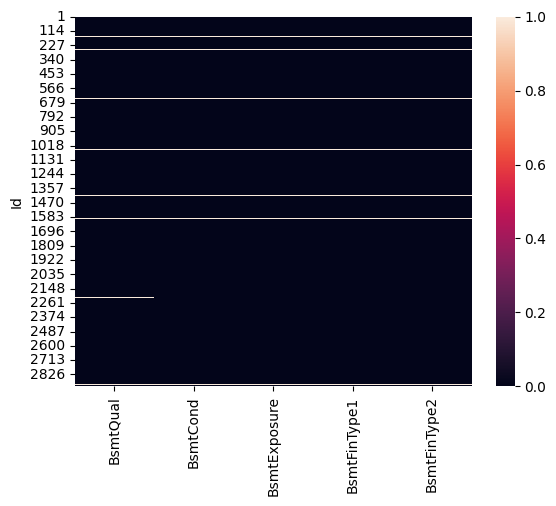

In [419]:
sns.heatmap(df_mvi[['BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2']].isnull())

In [420]:
# handlinng bastment   missing feature of categorical data

In [421]:
for feat in cat_bsmt_feat:
    print(df_mvi[feat].value_counts())


BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [422]:
# we assume their that  here the missing values mean  no basement so we replace with NAN
#An f-string allows you to directly insert variables or expressions inside a string using curly braces {}.
cat_bsmt_NAN = "NAN"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan , cat_bsmt_NAN,inplace= True)
    print(f"{feat} = {df_mvi[feat].isnull().sum()}")


BsmtQual = 0
BsmtCond = 0
BsmtExposure = 0
BsmtFinType1 = 0
BsmtFinType2 = 0


C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\1245507833.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan , cat_bsmt_NAN,inplace= True)


In [423]:
# we repalce  mssing value  with  0 in basement of numerical columns 
bsmt_nums = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan , bsmt_nums , inplace=True)
    print(f" {feat} = {df_mvi[feat].isnull().sum()} ")


 BsmtFinSF1 = 0 
 BsmtFinSF2 = 0 
 BsmtUnfSF = 0 
 TotalBsmtSF = 0 
 BsmtFullBath = 0 
 BsmtHalfBath = 0 


C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\2435820808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan , bsmt_nums , inplace=True)


In [424]:
df_ekk = df[["Electrical" , "KitchenQual", "KitchenAbvGr"]]  # for multiple columns we always need two square bricket
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [425]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan , electrical_mode ,inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\2469851109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan , electrical_mode ,inplace=True)


np.int64(0)

In [426]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan , electrical_mode ,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\1139336841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan , electrical_mode ,inplace=True)


np.int64(0)

In [427]:
df[missing_columns].select_dtypes(include = 'object').columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [428]:
#handling remaining cat features

In [429]:
cat_NAN = "NA"
cat_NA_feat = ["FireplaceQu","PoolQC","MiscFeature","Fence"]
#df_mvi[cat_NA_feat].replace(np.nan , cat_NAN,inplace=True)
for col in cat_NA_feat:
    df_mvi[col].replace(np.nan,cat_NAN,inplace=True )
    print(f" {col} missing values = {df_mvi[col].isnull().sum()}")
#df_mvi[cat_NA_feat].isnull().sum()


 FireplaceQu missing values = 0
 PoolQC missing values = 0
 MiscFeature missing values = 0
 Fence missing values = 0


C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\599952131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[col].replace(np.nan,cat_NAN,inplace=True )


In [430]:
# now  handle missing  value of this two Functional and SaleType
functional_mode = df_mvi["Functional"].mode()[0]
saletype_mode = df_mvi["SaleType"].mode()[0]
df_mvi["Functional"].replace(np.nan,functional_mode,inplace=True)
df_mvi["SaleType"].replace(np.nan,saletype_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()
df_mvi["Functional"].isnull().sum()



C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\4292527625.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,functional_mode,inplace=True)
C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\4292527625.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

np.int64(0)

In [431]:
# this is  missing value  of categorical data
'''
Functional       0.068517   #mode
FireplaceQu     48.646797   #NA
PoolQC          99.657417   #NA
Fence           80.438506   #NA
MiscFeature     96.402878   #NA
SaleType        0.034258    #mode
'''

'\nFunctional       0.068517   #mode\nFireplaceQu     48.646797   #NA\nPoolQC          99.657417   #NA\nFence           80.438506   #NA\nMiscFeature     96.402878   #NA\nSaleType        0.034258    #mode\n'

In [432]:
float_na_feat

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [433]:
# handling  garage feature 

In [434]:
# this  is missing vlaues of numerical columns 
"""
GarageYrBlt      5.447071   0
GarageCars       0.034258   0
GarageArea       0.034258   0
"""

#this is missing vlaues of  categorical data 
"""
GarageType       5.378554   NA
GarageFinish     5.447071   NA
GarageQual       5.447071   NA
GarageCond       5.447071   NA
"""

'\nGarageType       5.378554   NA\nGarageFinish     5.447071   NA\nGarageQual       5.447071   NA\nGarageCond       5.447071   NA\n'

In [435]:
# handle data for numerical 
num_garage_feat = ["GarageYrBlt","GarageCars","GarageArea"]
num_garage_replace = 0;

""" You’re making a new temporary DataFrame, and .replace(..., inplace=True)
 is applied only on that temporary copy, not the actual df_mvi."""
for col in num_garage_feat:
    df_mvi[col].replace(np.nan , num_garage_replace , inplace= True)
    print(f"{col} =  {df_mvi[col].isnull().sum()}")
#df_mvi[num_garage_feat].replace(np.nan , num_garage_replace , inplace=True)
#df_mvi[num_garage_feat].isnull().sum() 

GarageYrBlt =  0
GarageCars =  0
GarageArea =  0


C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\1502896490.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[col].replace(np.nan , num_garage_replace , inplace= True)


In [436]:
# handle data for categorical 
cat_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]
cat_garage_replace="NA"
for col in cat_garage_feat:
    df_mvi[col].replace(np.nan , cat_garage_replace , inplace= True)
    print(f"{col} =  {df_mvi[col].isnull().sum()}")

GarageType =  0
GarageFinish =  0
GarageQual =  0
GarageCond =  0


C:\Users\ratho\AppData\Local\Temp\ipykernel_22764\3032001093.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[col].replace(np.nan , cat_garage_replace , inplace= True)


In [437]:
cat_na_feat

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [438]:
# it basically me that  only one row has missing values
#  this one missing vlaue is   in salePrice  columns
"""in traing a dataset we  can predict the msising vlaues of house  
price  from other price"""
df_mvi.isnull().any(axis=0).sum()  #it check columns wise due to 0 if put check rows wise 

np.int64(1)

In [439]:
## feature transformation
### convert numerical feature to categorical feature 


In [440]:
"""
✅ Short Answer: Why convert numerical to categorical?
We convert numerical to categorical when the numbers don’t represent actual quantity, but instead represent groups, labels, or time periods — to help the model:

Avoid wrong assumptions (e.g., that 2000 is twice 1000)

Improve interpretability (like grouping ages or years)

Handle real-world patterns (like seasons, decades)

Prevent overfitting on meaningless numeric differences

Make the data meaningful for tree-based models
"""

'\n✅ Short Answer: Why convert numerical to categorical?\nWe convert numerical to categorical when the numbers don’t represent actual quantity, but instead represent groups, labels, or time periods — to help the model:\n\nAvoid wrong assumptions (e.g., that 2000 is twice 1000)\n\nImprove interpretability (like grouping ages or years)\n\nHandle real-world patterns (like seasons, decades)\n\nPrevent overfitting on meaningless numeric differences\n\nMake the data meaningful for tree-based models\n'

In [441]:
for_num_conv = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [442]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [443]:
# here of number of  month  we need to convert   name of months 
# getting  unique  values 
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [444]:
#now  above value has to be map with month name  so for this need to import calendar
calendar.month_abbr[1]


'Jan'

In [448]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])

In [449]:
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [451]:
# convert   other  left feature to String
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [453]:
df_mvi[for_num_conv].dtypes

MSSubClass      object
YearBuilt       object
YearRemodAdd    object
GarageYrBlt     object
MoSold          object
YrSold          object
dtype: object

In [455]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,Feb,2008
2,20,1976,1976,1976.0,May,2007
3,60,2001,2002,2001.0,Sep,2008
4,70,1915,1970,1998.0,Feb,2006
5,60,2000,2000,2000.0,Dec,2008


In [ ]:
## machine  learning  algorith only work numerical data  so we have to convert  categorical data
## to numerical data 

"""orignal encoding"""